In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [ ]:
dfAll = pd.read_csv("fashion-mnist_train.csv")
df = dfAll[((dfAll.label == 0) | (dfAll.label == 1))]

In [ ]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
10,0,0,0,0,0,1,0,0,0,0,...,164,177,163,0,0,1,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24,0,0,0,0,0,0,0,0,0,40,...,125,93,87,49,0,0,0,0,0,0
29,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# We will split our data

from sklearn.model_selection import train_test_split

X = df.drop(["label"], axis=1)
Y = df.label
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

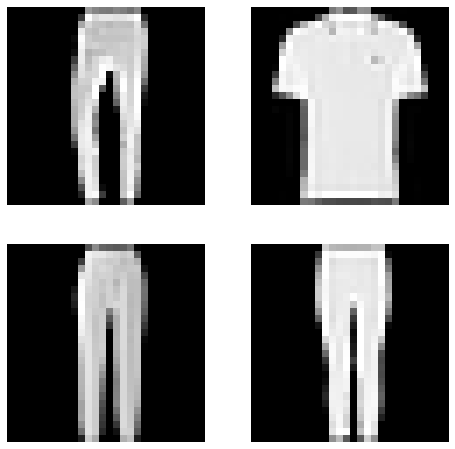

In [ ]:
# Example Images

plt.figure(figsize=(8,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.axis('off')
    plt.imshow(x_train.head().values[i].reshape(28,28), cmap='gray', interpolation='none')

In [ ]:
x_train = x_train.values.T
y_train = y_train.values.reshape(8400,1).T
x_test = x_test.values.T
y_test = y_test.values.reshape(3600,1).T

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

def buildClassifier():
    classifier = Sequential()
    classifier.add(Dense(units=8, kernel_initializer="uniform", activation="relu", input_dim=x_train.shape[0])) # Hidden Layer 1 with 8 nodes
    classifier.add(Dense(units=6, kernel_initializer="uniform", activation="relu"))  # Hidden Layer 2 with 6 nodes
    classifier.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid")) # Output Layer
    classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
    return classifier


classifier = KerasClassifier(build_fn=buildClassifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train.T, y = y_train.T, cv=3)
mean = accuracies.mean()
variance = accuracies.std()

print("Accuracy Mean is {:.2f}%".format(mean*100))
print("Accuracy Variance is {}".format(variance))

/var/folders/pk/39g3jn2x3bg7bs14xygdbsb00000gn/T/ipykernel_1506/4087657500.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn=buildClassifier, epochs = 100)
2022-11-17 14:17:41.392238: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
175/175 [==============================] - 1s 2ms/step - loss: 0.1172 - accuracy: 0.9632
Epoch 2/100
175/175 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.9804
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 0.0422 - accuracy: 0.9862
Epoch 4/100
175/175 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9870
Epoch 5/100
175/175 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9859
Epoch 6/100
175/175 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9900
Epoch 7/100
175/175 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9889
Epoch 8/100
175/175 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 0.9929
Epoch 9/100
175/175 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 0.9929
Epoch 10/100
175/175 [==============================] - 0s 2ms/step - loss: 0.0175 - accura